In [169]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [172]:
#Algo
Data = []
r = 10
center = [0,0]
P = []
P.append(math.ceil(5/4-r))
X = []
X.append(center[0])
Y = []
Y.append(r)
i = 0
while X[-1] < Y[-1]:
    X.append(X[i]+1)
    if P[i] < 0:
        Y.append(Y[i])
        P.append(P[i] + 2*X[i+1] + 1)
    else:
        Y.append(Y[i] - 1)
        P.append(P[i] + 2*X[i+1] + 1 - 2*Y[i+1])
    Data.append([i, P[i], X[i], Y[i], P[i]])
    i += 1

Data = np.array(Data)
tb = pd.DataFrame(data=Data, columns=["i","P", "X", "Y", "P+1"])
print(tb)
# print(Data)

   i   P  X   Y  P+1
0  0  -8  0  10   -8
1  1  -5  1  10   -5
2  2   0  2  10    0
3  3 -11  3   9  -11
4  4  -2  4   9   -2
5  5   9  5   9    9
6  6   6  6   8    6


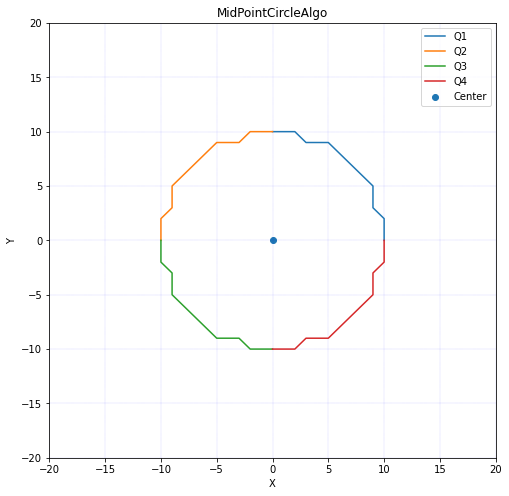

In [173]:
X_cord = [] #to store Quadrant1 cords
Y_cord = []
for n in Data[:,2]:
    X_cord.append(n)
for n in np.flipud(Data[:,3]):
    X_cord.append(n)

for n in Data[:,3]:
    Y_cord.append(n)
for n in np.flipud(Data[:,2]):
    Y_cord.append(n)


#Plot
q = 2 #resolution quotient
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set(title='MidPointCircleAlgo',
       xlabel='X', ylabel='Y',
       xlim=(-q*r, q*r), ylim=(-q*r, q*r))
ax.grid(True)
ax.grid(color='b', ls = '-.', lw = 0.1)
plt.scatter(center[0], center[1], label='Center')
plt.plot(X_cord, Y_cord, label='Q1')
plt.plot([i * -1 for i in X_cord], Y_cord, label='Q2')
plt.plot([i * -1 for i in X_cord], [i * -1 for i in Y_cord], label='Q3')
plt.plot(X_cord, [i * -1 for i in Y_cord], label='Q4')

plt.legend()
plt.show()
